Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset, including barris among predictors

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed_2019.pkl")

In [4]:
data.reset_index(drop=True, inplace=True)

In [5]:
data.head()

,Would_live_in_another_neighborhood,District,Woman,Car,Support_with_housework,Owner,House_size,No_of_people_in_the_house,Family_type,Financial_situation,...,CIRCULATION AND TRAFFIC,BUS,CITIZEN SECURITY IN THE CITY AS A WHOLE,CITY MANAGEMENT,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction,BCN_over_barri_transport,BCN_over_barri_management,BCN_over_barri_security
0,0.0,SANTS - MONTJUÏC,0,1,0.0,1.0,51-100 M2,TWO,COUPLE WITH NO CHILDREN,GOOD,...,GOOD,GOOD,"NEITHER BAD, NOR GOOD",GOOD,0,0,0,0,0,0
1,0.0,SANTS - MONTJUÏC,1,0,0.0,1.0,51-100 M2,ONE,SINGLE,BAD,...,"NEITHER BAD, NOR GOOD",GOOD,GOOD,"NEITHER BAD, NOR GOOD",1,0,0,0,0,0
2,0.0,SANTS - MONTJUÏC,1,0,1.0,0.0,51-100 M2,ONE,SINGLE,GOOD,...,"NEITHER BAD, NOR GOOD",GOOD,"NEITHER BAD, NOR GOOD","NEITHER BAD, NOR GOOD",0,0,0,1,0,0
3,1.0,SANTS - MONTJUÏC,0,0,0.0,1.0,< 50 M2,TWO,COUPLE WITH NO CHILDREN,BAD,...,"NEITHER BAD, NOR GOOD",GOOD,"NEITHER BAD, NOR GOOD","NEITHER BAD, NOR GOOD",0,0,1,0,0,0
4,0.0,SANTS - MONTJUÏC,1,0,1.0,1.0,51-100 M2,TWO,SINGLE-PARENT WITH CHILDREN,GOOD,...,"NEITHER BAD, NOR GOOD","NEITHER BAD, NOR GOOD",GOOD,GOOD,0,1,0,0,0,0


In [6]:
data.shape

(1169, 48)

In [7]:
for i in data.columns.tolist():
    display(pd.crosstab(data[i], data.Would_live_in_another_neighborhood))

Would_live_in_another_neighborhood,0.0,1.0
Would_live_in_another_neighborhood,,
0.0,1014,0
1.0,0,155


Would_live_in_another_neighborhood,0.0,1.0
District,,
CIUTAT VELLA,60,8
EIXAMPLE,178,20
GRÀCIA,83,12
HORTA - GUINARDÓ,111,21
LES CORTS,104,4
NOU BARRIS,94,23
SANT ANDREU,83,22
SANT MARTÍ,128,18
SANTS - MONTJUÏC,80,22


Would_live_in_another_neighborhood,0.0,1.0
Woman,,
0,399,61
1,615,94


Would_live_in_another_neighborhood,0.0,1.0
Car,,
0,476,63
1,538,92


Would_live_in_another_neighborhood,0.0,1.0
Support_with_housework,,
0.0,652,110
1.0,362,45


Would_live_in_another_neighborhood,0.0,1.0
Owner,,
0.0,207,28
1.0,807,127


Would_live_in_another_neighborhood,0.0,1.0
House_size,,
101-150 M2,125,15
51-100 M2,723,115
< 50 M2,57,14
> 150 M2,42,5
I DON'T KNOW,67,6


Would_live_in_another_neighborhood,0.0,1.0
No_of_people_in_the_house,,
ONE,352,52
THREE OR MORE,136,24
TWO,526,79


Would_live_in_another_neighborhood,0.0,1.0
Family_type,,
COUPLE WITH CHILDREN,97,14
COUPLE WITH NO CHILDREN,451,67
OTHER,47,11
SINGLE,352,52
SINGLE-PARENT WITH CHILDREN,67,11


Would_live_in_another_neighborhood,0.0,1.0
Financial_situation,,
BAD,387,63
GOOD,627,92


Would_live_in_another_neighborhood,0.0,1.0
Disability,,
0.0,851,121
1.0,163,34


Would_live_in_another_neighborhood,0.0,1.0
Living_with_disabled_person,,
0,719,105
1,295,50


Would_live_in_another_neighborhood,0.0,1.0
Time_living_in_BCN,,
I HAVE ALWAYS LIVED IN THE CITY,433,68
LESS THAN 10 YEARS,21,7
MORE THAN 10 YEARS,560,80


Would_live_in_another_neighborhood,0.0,1.0
Time_living_in_barri,,
I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD,135,7
LESS THAN 10 YEARS,57,16
MORE THAN 10 YEARS,822,132


Would_live_in_another_neighborhood,0.0,1.0
Barri_evolution,,
IT HAS IMPROVED,408,59
IT HAS WORSENED,229,46
IT IS THE SAME,377,50


Would_live_in_another_neighborhood,0.0,1.0
BCN_evolution,,
IT HAS IMPROVED,272,36
IT HAS WORSENED,512,85
IT IS THE SAME,230,34


Would_live_in_another_neighborhood,0.0,1.0
Barri_future,,
IT WILL IMPROVE,574,79
IT WILL STAY THE SAME,286,45
IT WILL WORSEN,154,31


Would_live_in_another_neighborhood,0.0,1.0
BCN_future,,
IT WILL IMPROVE,543,92
IT WILL STAY THE SAME,240,32
IT WILL WORSEN,231,31


Would_live_in_another_neighborhood,0.0,1.0
Barri_satisfaction,,
FAIRLY SATISFIED,75,25
NOT SATISFIED,1,9
SATISFIED,938,121


Would_live_in_another_neighborhood,0.0,1.0
BCN_satisfaction,,
FAIRLY SATISFIED,118,22
NOT SATISFIED,8,1
SATISFIED,888,132


Would_live_in_another_neighborhood,0.0,1.0
Barri_security,,
BAD,151,40
GOOD,453,49
"NEITHER BAD, NOR GOOD",410,66


Would_live_in_another_neighborhood,0.0,1.0
BCN_security,,
BAD,198,40
GOOD,284,38
"NEITHER BAD, NOR GOOD",532,77


Would_live_in_another_neighborhood,0.0,1.0
Barri_management,,
BAD,65,17
GOOD,508,56
"NEITHER BAD, NOR GOOD",441,82


Would_live_in_another_neighborhood,0.0,1.0
BCN_management,,
BAD,95,21
GOOD,429,46
"NEITHER BAD, NOR GOOD",490,88


Would_live_in_another_neighborhood,0.0,1.0
Barri_comparison,,
"NEITHER THE BEST, NOR THE WORST",340,94
ONE OF THE BEST,645,41
ONE OF THE WORST,29,20


Would_live_in_another_neighborhood,0.0,1.0
Barri_association,,
0.0,803,128
1.0,211,27


Would_live_in_another_neighborhood,0.0,1.0
Barri_transport,,
BAD,148,22
GOOD,808,120
"NEITHER BAD, NOR GOOD",58,13


Would_live_in_another_neighborhood,0.0,1.0
BCN_transport,,
BAD,95,21
GOOD,821,125
"NEITHER BAD, NOR GOOD",98,9


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_security,,
0,856,131
1,158,24


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_streets_cleaning,,
0,915,138
1,99,17


Would_live_in_another_neighborhood,0.0,1.0
Barri_problem_with_mobility,,
0,958,148
1,56,7


Would_live_in_another_neighborhood,0.0,1.0
Residential_satisfaction,,
0,126,23
1,888,132


Would_live_in_another_neighborhood,0.0,1.0
GARBAGE COLLECTION,,
BAD,37,3
GOOD,760,112
"NEITHER BAD, NOR GOOD",217,40


Would_live_in_another_neighborhood,0.0,1.0
STREETS CLEANING,,
BAD,109,16
GOOD,543,71
"NEITHER BAD, NOR GOOD",362,68


Would_live_in_another_neighborhood,0.0,1.0
NOISE,,
BAD,114,26
GOOD,442,64
"NEITHER BAD, NOR GOOD",458,65


Would_live_in_another_neighborhood,0.0,1.0
GREEN AREAS,,
BAD,100,20
GOOD,521,59
"NEITHER BAD, NOR GOOD",393,76


Would_live_in_another_neighborhood,0.0,1.0
PUBLIC LIGHTING,,
BAD,52,11
GOOD,643,94
"NEITHER BAD, NOR GOOD",319,50


Would_live_in_another_neighborhood,0.0,1.0
ASPHALT AND STREET CONSERVATION,,
BAD,118,26
GOOD,441,62
"NEITHER BAD, NOR GOOD",455,67


Would_live_in_another_neighborhood,0.0,1.0
CIRCULATION AND TRAFFIC,,
BAD,150,22
GOOD,346,51
"NEITHER BAD, NOR GOOD",518,82


Would_live_in_another_neighborhood,0.0,1.0
BUS,,
BAD,63,12
GOOD,689,103
"NEITHER BAD, NOR GOOD",262,40


Would_live_in_another_neighborhood,0.0,1.0
CITIZEN SECURITY IN THE CITY AS A WHOLE,,
BAD,198,40
GOOD,284,38
"NEITHER BAD, NOR GOOD",532,77


Would_live_in_another_neighborhood,0.0,1.0
CITY MANAGEMENT,,
BAD,95,21
GOOD,429,46
"NEITHER BAD, NOR GOOD",490,88


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_evolution,,
0,908,140
1,106,15


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_future,,
0,866,126
1,148,29


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_satisfaction,,
0,963,126
1,51,29


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_transport,,
0,917,146
1,97,9


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_management,,
0,978,147
1,36,8


Would_live_in_another_neighborhood,0.0,1.0
BCN_over_barri_security,,
0,969,145
1,45,10


In [8]:
data.columns.tolist()

['Would_live_in_another_neighborhood',
 'District',
 'Woman',
 'Car',
 'Support_with_housework',
 'Owner',
 'House_size',
 'No_of_people_in_the_house',
 'Family_type',
 'Financial_situation',
 'Disability',
 'Living_with_disabled_person',
 'Time_living_in_BCN',
 'Time_living_in_barri',
 'Barri_evolution',
 'BCN_evolution',
 'Barri_future',
 'BCN_future',
 'Barri_satisfaction',
 'BCN_satisfaction',
 'Barri_security',
 'BCN_security',
 'Barri_management',
 'BCN_management',
 'Barri_comparison',
 'Barri_association',
 'Barri_transport',
 'BCN_transport',
 'Barri_problem_with_security',
 'Barri_problem_with_streets_cleaning',
 'Barri_problem_with_mobility',
 'Residential_satisfaction',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'NOISE',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'CIRCULATION AND TRAFFIC',
 'BUS',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITY MANAGEMENT',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfactio

In [9]:
x_var = ['District', # neighbourhood & city
 'Woman', # gender
 'Car', # support / health
 'Support_with_housework', # support
 'Owner', # housing
 'House_size', # housing
 'No_of_people_in_the_house', # housing
 'Family_type', # family
 'Financial_situation', # financial situation
 'Disability', # health
 'Living_with_disabled_person', # health
 'Time_living_in_barri', # attachment
 'Barri_evolution', # neighbourhood & city
 'Barri_future', # neighbourhood & city
 'Barri_satisfaction', # neighbourhood & city
 'Barri_security', # neighbourhood & city
 'Barri_management', # neighbourhood & city
 'Barri_comparison', # neighbourhood & city
 'Barri_association', # neighbourhood & city
 'Barri_transport', # neighbourhood & city
 'BCN_over_barri_evolution', # neighbourhood & city
 'BCN_over_barri_future', # neighbourhood & city
 'BCN_over_barri_satisfaction', # neighbourhood & city
 'BCN_over_barri_transport', # neighbourhood & city
 'BCN_over_barri_management', # neighbourhood & city
 'BCN_over_barri_security'] # neighbourhood & city

In [10]:
y = data['Would_live_in_another_neighborhood']

In [11]:
x = pd.get_dummies(data[x_var])

In [12]:
x.columns.tolist()

['Woman',
 'Car',
 'Support_with_housework',
 'Owner',
 'Disability',
 'Living_with_disabled_person',
 'Barri_association',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction',
 'BCN_over_barri_transport',
 'BCN_over_barri_management',
 'BCN_over_barri_security',
 'District_CIUTAT VELLA',
 'District_EIXAMPLE',
 'District_GRÀCIA',
 'District_HORTA - GUINARDÓ',
 'District_LES CORTS',
 'District_NOU BARRIS',
 'District_SANT ANDREU',
 'District_SANT MARTÍ',
 'District_SANTS - MONTJUÏC',
 'District_SARRIÀ - SANT GERVASI',
 'House_size_101-150 M2',
 'House_size_51-100 M2',
 'House_size_< 50 M2',
 'House_size_> 150 M2',
 "House_size_I DON'T KNOW",
 'No_of_people_in_the_house_ONE',
 'No_of_people_in_the_house_THREE OR MORE',
 'No_of_people_in_the_house_TWO',
 'Family_type_COUPLE WITH CHILDREN',
 'Family_type_COUPLE WITH NO CHILDREN',
 'Family_type_OTHER',
 'Family_type_SINGLE',
 'Family_type_SINGLE-PARENT WITH CHILDREN',
 'Financial_situation_BAD',
 'Financial

In [13]:
for i in ['District_EIXAMPLE',
          'House_size_< 50 M2',
          'No_of_people_in_the_house_ONE',
          'Family_type_OTHER',
          'Financial_situation_GOOD',
          'Time_living_in_barri_LESS THAN 10 YEARS',
          'Barri_evolution_IT HAS IMPROVED',
          'Barri_future_IT WILL IMPROVE',
          'Barri_satisfaction_SATISFIED',
          'Barri_security_GOOD',
          'Barri_management_GOOD',
          'Barri_comparison_ONE OF THE BEST',
          'Barri_transport_GOOD']:
    del x[i]

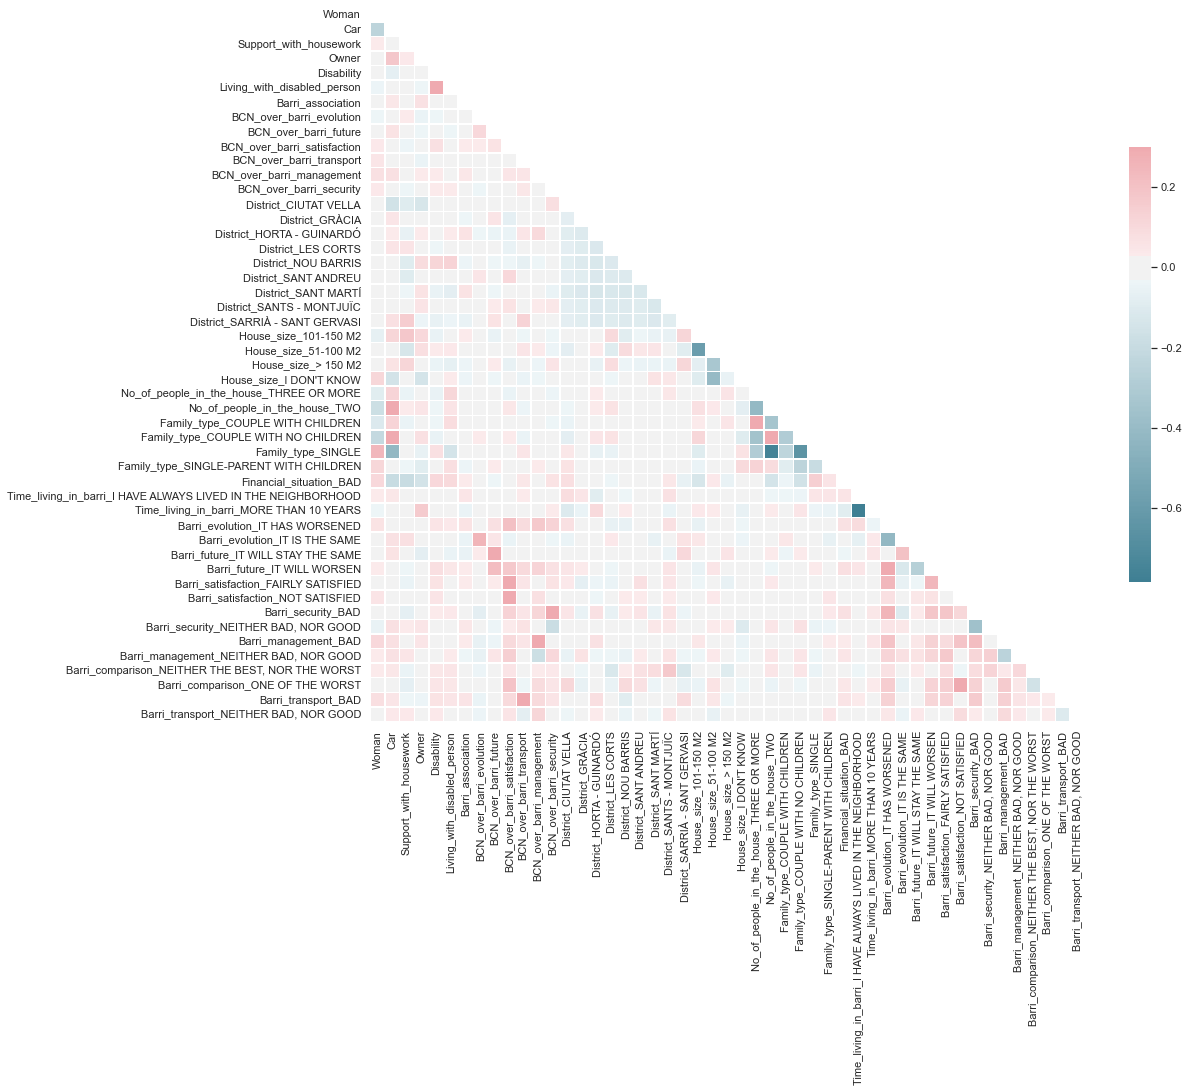

In [14]:
import seaborn as sns # just a conventional alias, don't know why
sns.set(style="white")

corr = x.corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 16))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, #annot = corr.round(2), 
            linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
x = sm.add_constant(x)

In [16]:
x.shape

(1169, 50)

# Models

In [17]:
sm.families.family.Binomial.links

[statsmodels.genmod.families.links.logit,
 statsmodels.genmod.families.links.probit,
 statsmodels.genmod.families.links.cauchy,
 statsmodels.genmod.families.links.log,
 statsmodels.genmod.families.links.cloglog,
 statsmodels.genmod.families.links.identity]

In [18]:
def odds_ratios(results):
    return np.exp(results.params)

def classification_table(results):
    df_classification_table = pd.DataFrame(y).join(pd.DataFrame(results.predict(x).round()))
    df_classification_table.rename(columns={'Would_live_in_another_neighborhood': 'y', 0: 'y_predict'}, inplace=True)
    return pd.crosstab(df_classification_table['y'], df_classification_table['y_predict'])

def plot_roc_auc(results):
    y_predict = results.predict(x)
    roc_auc = roc_auc_score(y, y_predict)
    fpr, tpr, thresholds = roc_curve(y, y_predict)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# https://github.com/statsmodels/statsmodels/issues/5861
def pseudo_r2(results):
    return print("Pseudo R2:", (1 - results.llf / results.llnull))

def adj_pseudo_r2(results):
    return print("Adjusted Pseudo R2:", (1 - (results.llf - results.params.shape[0]+1) / results.llnull))

def adj_count_r2(results):
    df_classification_table = pd.DataFrame(y).join(pd.DataFrame(results.predict(x).round()))
    df_classification_table.rename(columns={'Would_live_in_another_neighborhood': 'y', 0: 'y_predict'}, inplace=True)
    df = pd.crosstab(df_classification_table['y'], df_classification_table['y_predict'])
    return print("Adj Count R2:", round((df[0][0] + df[1][1] - (df[0][0]+df[1][0]))/(df[0][1]+df[1][1]),3))

# Logit

In [19]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1169
Model:                                            GLM   Df Residuals:                     1120
Model Family:                                Binomial   Df Model:                           48
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -376.11
Date:                                Sun, 08 Aug 2021   Deviance:                       752.23
Time:                                        12:51:35   Pearson chi2:                 1.27e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.0737      0.456     -2.352      0.019      -1.968      -0.179
Woman                                                           -0.0930      0.212     -0.439      0.660      -0.508       0.322
Car                                                              0.3431      0.233      1.472      0.141      -0.114       0.800
Support_with_housework                                           0.0383      0.227      0.169      0.866      -0.407       0.484
Owner                                                            0.0917      0.280      0.327      0.743      -0.457       0.641
Disability                                                       0.3594      0.380      0.945      0.345      -0.386       1.105
Living_with_disabled_person                                     -0.3036      0.328     -0.926      0.355      -0.946       0.339
Barri_association                                               -0.3707      0.257     -1.441      0.150      -0.875       0.134
BCN_over_barri_evolution                                         0.0589      0.353      0.167      0.867      -0.632       0.750
BCN_over_barri_future                                            0.4512      0.303      1.487      0.137      -0.143       1.046
BCN_over_barri_satisfaction                                      1.0905      0.653      1.670      0.095      -0.189       2.370
BCN_over_barri_transport                                        -0.7977      0.528     -1.512      0.131      -1.832       0.237
BCN_over_barri_management                                       -0.4118      0.697     -0.591      0.555      -1.779       0.955
BCN_over_barri_security                                         -0.0049      0.464     -0.011      0.992      -0.915       0.905
District_CIUTAT VELLA                                            0.0591      0.526      0.112      0.910      -0.972       1.090
District_GRÀCIA                                                  0.4840      0.422      1.146      0.252      -0.344       1.312
District_HORTA - GUINARDÓ                                        0.6435      0.379      1.698      0.089      -0.099       1.386
District_LES CORTS                                              -0.8210      0.589     -1.395      0.163      -1.975       0.333
District_NOU BARRIS                                              0.6139      0.392      1.568      0.117      -0.154       1.382
District_SANT ANDREU                                             0.52

In [20]:
glm_logit_results.aic

850.2295527820288

In [21]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7159.3428840666875

In [22]:
pseudo_r2(glm_logit_results)

Pseudo R2: 0.17773202803245125


In [23]:
adj_pseudo_r2(glm_logit_results)

Adjusted Pseudo R2: 0.07060746618188829


In [24]:
adj_count_r2(glm_logit_results)

Adj Count R2: 0.077


In [25]:
classification_table(glm_logit_results)

y_predict,0.0,1.0
y,,
0.0,1008,6
1.0,137,18


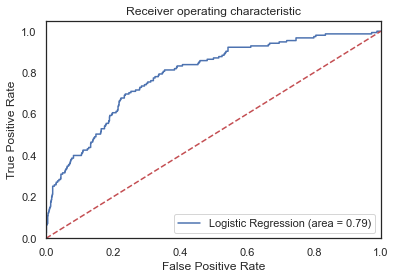

In [26]:
plot_roc_auc(glm_logit_results)

In [27]:
glm_logit_results.pvalues.sort_values(ascending=False)

BCN_over_barri_security                                         9.915535e-01
House_size_> 150 M2                                             9.738995e-01
Barri_future_IT WILL WORSEN                                     9.306495e-01
District_CIUTAT VELLA                                           9.104970e-01
BCN_over_barri_evolution                                        8.674181e-01
Support_with_housework                                          8.661781e-01
Barri_transport_NEITHER BAD, NOR GOOD                           8.510790e-01
No_of_people_in_the_house_THREE OR MORE                         7.943511e-01
District_SANT MARTÍ                                             7.908681e-01
Financial_situation_BAD                                         7.667681e-01
Barri_satisfaction_FAIRLY SATISFIED                             7.542500e-01
Owner                                                           7.434031e-01
Barri_future_IT WILL STAY THE SAME                              6.656055e-01

In [28]:
for i in x.columns.tolist():
    if i[:8] == 'District':
        del x[i]

In [29]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1169
Model:                                            GLM   Df Residuals:                     1129
Model Family:                                Binomial   Df Model:                           39
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -382.90
Date:                                Sun, 08 Aug 2021   Deviance:                       765.79
Time:                                        12:51:35   Pearson chi2:                 1.21e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.0315      0.408     -2.529      0.011      -1.831      -0.232
Woman                                                           -0.0905      0.210     -0.431      0.667      -0.502       0.321
Car                                                              0.3143      0.228      1.381      0.167      -0.132       0.760
Support_with_housework                                          -0.0835      0.219     -0.382      0.703      -0.512       0.345
Owner                                                            0.2336      0.269      0.867      0.386      -0.294       0.762
Disability                                                       0.4446      0.374      1.190      0.234      -0.288       1.177
Living_with_disabled_person                                     -0.2841      0.321     -0.884      0.376      -0.914       0.346
Barri_association                                               -0.3274      0.253     -1.296      0.195      -0.822       0.168
BCN_over_barri_evolution                                         0.0659      0.349      0.189      0.850      -0.618       0.749
BCN_over_barri_future                                            0.4383      0.297      1.473      0.141      -0.145       1.021
BCN_over_barri_satisfaction                                      1.0954      0.641      1.709      0.087      -0.161       2.351
BCN_over_barri_transport                                        -0.7822      0.522     -1.497      0.134      -1.806       0.242
BCN_over_barri_management                                       -0.2554      0.691     -0.370      0.712      -1.610       1.099
BCN_over_barri_security                                         -0.0911      0.460     -0.198      0.843      -0.994       0.811
House_size_101-150 M2                                           -0.6526      0.479     -1.363      0.173      -1.591       0.286
House_size_51-100 M2                                            -0.3785      0.369     -1.025      0.306      -1.103       0.346
House_size_> 150 M2                                             -0.2246      0.630     -0.357      0.721      -1.459       1.010
House_size_I DON'T KNOW                                         -0.8418      0.564     -1.492      0.136      -1.947       0.264
No_of_people_in_the_house_THREE OR MORE                          0.1138      0.358      0.318      0.751      -0.588       0.815
No_of_people_in_the_house_TWO                                   -0.50

In [30]:
glm_logit_results.aic

845.7922817566337

In [31]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7209.35529074533

In [32]:
glm_logit_results.pvalues.sort_values(ascending=False)

Barri_transport_NEITHER BAD, NOR GOOD                           8.703039e-01
BCN_over_barri_evolution                                        8.501387e-01
BCN_over_barri_security                                         8.431794e-01
No_of_people_in_the_house_THREE OR MORE                         7.505667e-01
Barri_future_IT WILL WORSEN                                     7.473285e-01
House_size_> 150 M2                                             7.213355e-01
BCN_over_barri_management                                       7.116237e-01
Support_with_housework                                          7.025504e-01
Barri_management_BAD                                            6.983896e-01
Financial_situation_BAD                                         6.958094e-01
Woman                                                           6.667409e-01
Barri_satisfaction_FAIRLY SATISFIED                             6.452065e-01
Barri_transport_BAD                                             5.777588e-01

In [33]:
for i in ['Barri_transport_NEITHER BAD, NOR GOOD', 'Barri_transport_BAD',
          'BCN_over_barri_evolution',
          'BCN_over_barri_security',
          'Barri_future_IT WILL WORSEN', 'Barri_future_IT WILL STAY THE SAME',
          'BCN_over_barri_management', 
          'Support_with_housework',
          'Barri_management_BAD', 'Barri_management_NEITHER BAD, NOR GOOD',
          'Financial_situation_BAD', 
          'Woman']:
    del x[i]

In [34]:
# for i in ['BCN_over_barri_security', 
#           'Barri_transport_NEITHER BAD, NOR GOOD', 'Barri_transport_BAD',
#           'BCN_over_barri_evolution',
#           'Barri_future_IT WILL WORSEN', 'Barri_future_IT WILL STAY THE SAME',
#           'Support_with_housework',
#           'No_of_people_in_the_house_THREE OR MORE', 'No_of_people_in_the_house_TWO',
#           'BCN_over_barri_management', 
#           'Woman',
#           'Barri_management_BAD', 'Barri_management_NEITHER BAD, NOR GOOD',
#           'Financial_situation_BAD',
#           'Living_with_disabled_person',
#           'Owner',
#           'Barri_evolution_IT HAS WORSENED', 'Barri_evolution_IT IS THE SAME']:
#     del x[i]

In [35]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1169
Model:                                            GLM   Df Residuals:                     1141
Model Family:                                Binomial   Df Model:                           27
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -384.07
Date:                                Sun, 08 Aug 2021   Deviance:                       768.13
Time:                                        12:51:35   Pearson chi2:                 1.20e+03
No. Iterations:                                     7                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.0145      0.378     -2.682      0.007      -1.756      -0.273
Car                                                              0.3311      0.221      1.500      0.134      -0.102       0.764
Owner                                                            0.2301      0.264      0.871      0.384      -0.287       0.748
Disability                                                       0.4533      0.369      1.230      0.219      -0.269       1.176
Living_with_disabled_person                                     -0.2702      0.319     -0.846      0.398      -0.896       0.356
Barri_association                                               -0.3224      0.249     -1.292      0.196      -0.811       0.167
BCN_over_barri_future                                            0.3487      0.252      1.383      0.167      -0.145       0.843
BCN_over_barri_satisfaction                                      1.1068      0.619      1.787      0.074      -0.107       2.321
BCN_over_barri_transport                                        -0.6129      0.387     -1.585      0.113      -1.371       0.145
House_size_101-150 M2                                           -0.6903      0.468     -1.474      0.140      -1.608       0.228
House_size_51-100 M2                                            -0.3956      0.366     -1.082      0.279      -1.112       0.321
House_size_> 150 M2                                             -0.3017      0.618     -0.488      0.626      -1.513       0.910
House_size_I DON'T KNOW                                         -0.8910      0.557     -1.599      0.110      -1.983       0.201
No_of_people_in_the_house_THREE OR MORE                          0.1105      0.356      0.310      0.756      -0.587       0.808
No_of_people_in_the_house_TWO                                   -0.4938      0.346     -1.426      0.154      -1.172       0.185
Family_type_COUPLE WITH CHILDREN                                -0.9088      0.560     -1.624      0.104      -2.006       0.188
Family_type_COUPLE WITH NO CHILDREN                             -0.3153      0.481     -0.656      0.512      -1.258       0.627
Family_type_SINGLE                                              -0.6311      0.250     -2.521      0.012      -1.122      -0.140
Family_type_SINGLE-PARENT WITH CHILDREN                         -0.3067      0.527     -0.582      0.560      -1.339       0.726
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -2.14

In [36]:
glm_logit_results.aic

824.1331682358785

In [37]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7291.781251803751

In [38]:
glm_logit_results.pvalues.sort_values(ascending=False)

No_of_people_in_the_house_THREE OR MORE                         7.563170e-01
Barri_satisfaction_FAIRLY SATISFIED                             7.038275e-01
House_size_> 150 M2                                             6.255474e-01
Family_type_SINGLE-PARENT WITH CHILDREN                         5.603385e-01
Family_type_COUPLE WITH NO CHILDREN                             5.121255e-01
Barri_security_NEITHER BAD, NOR GOOD                            4.421851e-01
Living_with_disabled_person                                     3.975597e-01
Owner                                                           3.835192e-01
Barri_evolution_IT HAS WORSENED                                 3.412008e-01
House_size_51-100 M2                                            2.793385e-01
Disability                                                      2.188172e-01
Barri_association                                               1.962648e-01
BCN_over_barri_future                                           1.665173e-01

In [39]:
for i in ['House_size_> 150 M2', 'House_size_51-100 M2', 'House_size_101-150 M2', "House_size_I DON'T KNOW",
          'Disability', 'Living_with_disabled_person', 'Barri_association',
          'No_of_people_in_the_house_THREE OR MORE', 'No_of_people_in_the_house_TWO',
          'BCN_over_barri_future']:
    del x[i]

In [40]:
# for i in ['House_size_> 150 M2', 'House_size_51-100 M2', 'House_size_101-150 M2', "House_size_I DON'T KNOW",
#           'Barri_security_NEITHER BAD, NOR GOOD', 'Barri_security_BAD',
#           'Disability',
#           'BCN_over_barri_future']:
#     del x[i]

In [41]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1169
Model:                                            GLM   Df Residuals:                     1150
Model Family:                                Binomial   Df Model:                           18
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -389.16
Date:                                Sun, 08 Aug 2021   Deviance:                       778.31
Time:                                        12:51:36   Pearson chi2:                 1.22e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.6796      0.500     -3.356      0.001      -2.660      -0.699
Car                                                              0.3575      0.216      1.657      0.098      -0.065       0.781
Owner                                                            0.1485      0.255      0.582      0.560      -0.351       0.648
BCN_over_barri_satisfaction                                      1.2731      0.610      2.087      0.037       0.078       2.469
BCN_over_barri_transport                                        -0.5771      0.383     -1.508      0.131      -1.327       0.173
Family_type_COUPLE WITH CHILDREN                                -0.6383      0.479     -1.333      0.182      -1.577       0.300
Family_type_COUPLE WITH NO CHILDREN                             -0.5995      0.393     -1.526      0.127      -1.369       0.170
Family_type_SINGLE                                              -0.3164      0.402     -0.786      0.432      -1.105       0.472
Family_type_SINGLE-PARENT WITH CHILDREN                         -0.4059      0.514     -0.789      0.430      -1.414       0.602
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -2.0898      0.520     -4.018      0.000      -3.109      -1.071
Time_living_in_barri_MORE THAN 10 YEARS                         -0.9162      0.334     -2.740      0.006      -1.572      -0.261
Barri_evolution_IT HAS WORSENED                                 -0.1829      0.255     -0.717      0.473      -0.683       0.317
Barri_evolution_IT IS THE SAME                                  -0.2988      0.221     -1.351      0.177      -0.732       0.135
Barri_satisfaction_FAIRLY SATISFIED                             -0.3337      0.567     -0.589      0.556      -1.444       0.777
Barri_satisfaction_NOT SATISFIED                                 2.3824      1.270      1.876      0.061      -0.107       4.872
Barri_security_BAD                                               0.4517      0.275      1.644      0.100      -0.087       0.990
Barri_security_NEITHER BAD, NOR GOOD                             0.1675      0.220      0.762      0.446      -0.263       0.598
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.3981      0.207      6.747      0.000       0.992       1.804
Barri_comparison_ONE OF THE WORST                                1.7360      0.401      4.324      0.000       0.949       2.523
=====================================================================

In [42]:
glm_logit_results.aic

816.3117741729585

In [43]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7345.17778151992

In [44]:
glm_logit_results.pvalues.sort_values(ascending=False)

Owner                                                           5.602786e-01
Barri_satisfaction_FAIRLY SATISFIED                             5.559250e-01
Barri_evolution_IT HAS WORSENED                                 4.733172e-01
Barri_security_NEITHER BAD, NOR GOOD                            4.458726e-01
Family_type_SINGLE                                              4.315794e-01
Family_type_SINGLE-PARENT WITH CHILDREN                         4.301518e-01
Family_type_COUPLE WITH CHILDREN                                1.823950e-01
Barri_evolution_IT IS THE SAME                                  1.768353e-01
BCN_over_barri_transport                                        1.314567e-01
Family_type_COUPLE WITH NO CHILDREN                             1.269946e-01
Barri_security_BAD                                              1.001067e-01
Car                                                             9.761217e-02
Barri_satisfaction_NOT SATISFIED                                6.066841e-02

In [45]:
for i in ['Owner']:
    del x[i]

In [46]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1169
Model:                                            GLM   Df Residuals:                     1151
Model Family:                                Binomial   Df Model:                           17
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -389.33
Date:                                Sun, 08 Aug 2021   Deviance:                       778.66
Time:                                        12:51:36   Pearson chi2:                 1.23e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.6064      0.484     -3.318      0.001      -2.555      -0.658
Car                                                              0.3776      0.213      1.772      0.076      -0.040       0.795
BCN_over_barri_satisfaction                                      1.2768      0.610      2.093      0.036       0.081       2.473
BCN_over_barri_transport                                        -0.5843      0.382     -1.528      0.127      -1.334       0.165
Family_type_COUPLE WITH CHILDREN                                -0.6480      0.478     -1.355      0.176      -1.586       0.290
Family_type_COUPLE WITH NO CHILDREN                             -0.6143      0.392     -1.567      0.117      -1.383       0.154
Family_type_SINGLE                                              -0.3299      0.402     -0.822      0.411      -1.117       0.457
Family_type_SINGLE-PARENT WITH CHILDREN                         -0.4371      0.512     -0.854      0.393      -1.440       0.566
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -2.0472      0.515     -3.972      0.000      -3.057      -1.037
Time_living_in_barri_MORE THAN 10 YEARS                         -0.8606      0.320     -2.686      0.007      -1.489      -0.233
Barri_evolution_IT HAS WORSENED                                 -0.1838      0.255     -0.722      0.470      -0.683       0.315
Barri_evolution_IT IS THE SAME                                  -0.3035      0.221     -1.373      0.170      -0.737       0.130
Barri_satisfaction_FAIRLY SATISFIED                             -0.3423      0.567     -0.604      0.546      -1.453       0.768
Barri_satisfaction_NOT SATISFIED                                 2.3701      1.263      1.877      0.061      -0.105       4.845
Barri_security_BAD                                               0.4530      0.275      1.650      0.099      -0.085       0.991
Barri_security_NEITHER BAD, NOR GOOD                             0.1713      0.220      0.780      0.435      -0.259       0.602
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.3993      0.207      6.754      0.000       0.993       1.805
Barri_comparison_ONE OF THE WORST                                1.7313      0.402      4.311      0.000       0.944       2.518
================================================================================================================================
"""

In [47]:
glm_logit_results.aic

814.6568927642717

In [48]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7351.896566890078

In [49]:
glm_logit_results.pvalues.sort_values(ascending=False)

Barri_satisfaction_FAIRLY SATISFIED                             5.457842e-01
Barri_evolution_IT HAS WORSENED                                 4.704796e-01
Barri_security_NEITHER BAD, NOR GOOD                            4.354008e-01
Family_type_SINGLE                                              4.113610e-01
Family_type_SINGLE-PARENT WITH CHILDREN                         3.929937e-01
Family_type_COUPLE WITH CHILDREN                                1.755518e-01
Barri_evolution_IT IS THE SAME                                  1.697941e-01
BCN_over_barri_transport                                        1.265378e-01
Family_type_COUPLE WITH NO CHILDREN                             1.172106e-01
Barri_security_BAD                                              9.892239e-02
Car                                                             7.638409e-02
Barri_satisfaction_NOT SATISFIED                                6.053989e-02
BCN_over_barri_satisfaction                                     3.638011e-02

In [50]:
for i in ['BCN_over_barri_transport', 
          'Barri_evolution_IT HAS WORSENED', 'Barri_evolution_IT IS THE SAME',
         'Barri_security_BAD', 'Barri_security_NEITHER BAD, NOR GOOD']:
    del x[i]

In [51]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1169
Model:                                            GLM   Df Residuals:                     1156
Model Family:                                Binomial   Df Model:                           12
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -392.93
Date:                                Sun, 08 Aug 2021   Deviance:                       785.86
Time:                                        12:51:36   Pearson chi2:                 1.22e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.6783      0.471     -3.565      0.000      -2.601      -0.756
Car                                                              0.3537      0.211      1.676      0.094      -0.060       0.767
BCN_over_barri_satisfaction                                      1.2408      0.601      2.063      0.039       0.062       2.419
Family_type_COUPLE WITH CHILDREN                                -0.6792      0.474     -1.433      0.152      -1.608       0.250
Family_type_COUPLE WITH NO CHILDREN                             -0.6191      0.388     -1.598      0.110      -1.379       0.140
Family_type_SINGLE                                              -0.3863      0.397     -0.973      0.331      -1.165       0.392
Family_type_SINGLE-PARENT WITH CHILDREN                         -0.4477      0.510     -0.878      0.380      -1.447       0.551
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.9851      0.514     -3.864      0.000      -2.992      -0.978
Time_living_in_barri_MORE THAN 10 YEARS                         -0.8009      0.316     -2.531      0.011      -1.421      -0.181
Barri_satisfaction_FAIRLY SATISFIED                             -0.2819      0.553     -0.509      0.610      -1.366       0.803
Barri_satisfaction_NOT SATISFIED                                 2.3447      1.224      1.915      0.056      -0.055       4.745
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.4158      0.203      6.973      0.000       1.018       1.814
Barri_comparison_ONE OF THE WORST                                1.8241      0.394      4.633      0.000       1.052       2.596
================================================================================================================================
"""

In [52]:
glm_logit_results.aic

811.8618008288616

In [53]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7380.011178632849

In [54]:
glm_logit_results.pvalues.sort_values(ascending=False)

Barri_satisfaction_FAIRLY SATISFIED                             6.104983e-01
Family_type_SINGLE-PARENT WITH CHILDREN                         3.797637e-01
Family_type_SINGLE                                              3.306635e-01
Family_type_COUPLE WITH CHILDREN                                1.518561e-01
Family_type_COUPLE WITH NO CHILDREN                             1.100929e-01
Car                                                             9.369259e-02
Barri_satisfaction_NOT SATISFIED                                5.551135e-02
BCN_over_barri_satisfaction                                     3.907753e-02
Time_living_in_barri_MORE THAN 10 YEARS                         1.137382e-02
const                                                           3.638597e-04
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    1.115940e-04
Barri_comparison_ONE OF THE WORST                               3.602536e-06
Barri_comparison_NEITHER THE BEST, NOR THE WORST                3.099699e-12

In [55]:
for i in x.columns.tolist():
    if i[:6] == 'Family':
        del x[i]

In [56]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1169
Model:                                            GLM   Df Residuals:                     1160
Model Family:                                Binomial   Df Model:                            8
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -394.48
Date:                                Sun, 08 Aug 2021   Deviance:                       788.96
Time:                                        12:51:36   Pearson chi2:                 1.20e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.1202      0.329     -6.453      0.000      -2.764      -1.476
Car                                                              0.2534      0.189      1.341      0.180      -0.117       0.624
BCN_over_barri_satisfaction                                      1.2559      0.601      2.090      0.037       0.078       2.433
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.9547      0.511     -3.825      0.000      -2.956      -0.953
Time_living_in_barri_MORE THAN 10 YEARS                         -0.7944      0.317     -2.510      0.012      -1.415      -0.174
Barri_satisfaction_FAIRLY SATISFIED                             -0.3200      0.553     -0.578      0.563      -1.404       0.764
Barri_satisfaction_NOT SATISFIED                                 2.3046      1.223      1.885      0.059      -0.092       4.701
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.4047      0.202      6.940      0.000       1.008       1.801
Barri_comparison_ONE OF THE WORST                                1.8513      0.390      4.745      0.000       1.087       2.616
================================================================================================================================
"""

In [57]:
glm_logit_results.aic

806.9639574532791

In [58]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7405.164637854319

In [59]:
glm_logit_results.pvalues.sort_values(ascending=False)

Barri_satisfaction_FAIRLY SATISFIED                             5.629550e-01
Car                                                             1.798414e-01
Barri_satisfaction_NOT SATISFIED                                5.947499e-02
BCN_over_barri_satisfaction                                     3.657625e-02
Time_living_in_barri_MORE THAN 10 YEARS                         1.208437e-02
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    1.305361e-04
Barri_comparison_ONE OF THE WORST                               2.088813e-06
const                                                           1.097752e-10
Barri_comparison_NEITHER THE BEST, NOR THE WORST                3.932602e-12
dtype: float64

In [60]:
for i in ['Car']:
    del x[i]

In [61]:
glm_logit = sm.GLM(y, x, family=sm.families.Binomial())
glm_logit_results = glm_logit.fit()
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1169
Model:                                            GLM   Df Residuals:                     1161
Model Family:                                Binomial   Df Model:                            7
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -395.39
Date:                                Sun, 08 Aug 2021   Deviance:                       790.78
Time:                                        12:51:36   Pearson chi2:                 1.21e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.0266      0.320     -6.333      0.000      -2.654      -1.399
BCN_over_barri_satisfaction                                      1.2612      0.601      2.099      0.036       0.083       2.439
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.9037      0.509     -3.741      0.000      -2.901      -0.906
Time_living_in_barri_MORE THAN 10 YEARS                         -0.7492      0.314     -2.383      0.017      -1.365      -0.133
Barri_satisfaction_FAIRLY SATISFIED                             -0.3228      0.554     -0.583      0.560      -1.408       0.763
Barri_satisfaction_NOT SATISFIED                                 2.3276      1.223      1.902      0.057      -0.070       4.726
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.4169      0.202      7.012      0.000       1.021       1.813
Barri_comparison_ONE OF THE WORST                                1.8592      0.390      4.764      0.000       1.094       2.624
================================================================================================================================
"""

In [62]:
glm_logit_results.aic

806.778886601712

In [63]:
glm_logit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7410.413612667359

In [64]:
glm_logit_results.pvalues.sort_values(ascending=False)

Barri_satisfaction_FAIRLY SATISFIED                             5.601182e-01
Barri_satisfaction_NOT SATISFIED                                5.712194e-02
BCN_over_barri_satisfaction                                     3.585793e-02
Time_living_in_barri_MORE THAN 10 YEARS                         1.715628e-02
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    1.831512e-04
Barri_comparison_ONE OF THE WORST                               1.895998e-06
const                                                           2.403283e-10
Barri_comparison_NEITHER THE BEST, NOR THE WORST                2.357558e-12
dtype: float64

In [65]:
odds_ratios(glm_logit_results)

const                                                            0.131783
BCN_over_barri_satisfaction                                      3.529763
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD     0.149012
Time_living_in_barri_MORE THAN 10 YEARS                          0.472743
Barri_satisfaction_FAIRLY SATISFIED                              0.724150
Barri_satisfaction_NOT SATISFIED                                10.252854
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 4.124498
Barri_comparison_ONE OF THE WORST                                6.418561
dtype: float64

In [66]:
classification_table(glm_logit_results)

y_predict,0.0,1.0
y,,
0.0,1012,2
1.0,139,16


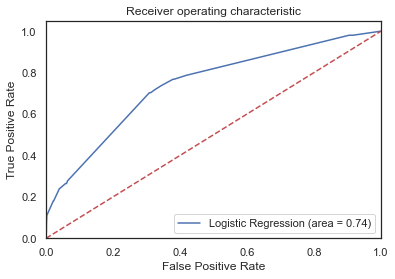

In [67]:
plot_roc_auc(glm_logit_results)

In [68]:
pseudo_r2(glm_logit_results)

Pseudo R2: 0.1355934515521997


In [69]:
adj_pseudo_r2(glm_logit_results)

Adjusted Pseudo R2: 0.12028994271640503


In [70]:
adj_count_r2(glm_logit_results)

Adj Count R2: 0.09


In [71]:
glm_logit_results.llf, glm_logit_results.llnull

(-395.389443300856, -457.41143910912047)

# Probit

In [72]:
glm_probit = sm.GLM(y, x, family=sm.families.Binomial(link=sm.genmod.families.links.probit))
glm_probit_results = glm_probit.fit()
glm_probit_results.summary()

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1169
Model:                                            GLM   Df Residuals:                     1161
Model Family:                                Binomial   Df Model:                            7
Link Function:                                 probit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -396.11
Date:                                Sun, 08 Aug 2021   Deviance:                       792.21
Time:                                        12:51:37   Pearson chi2:                 1.22e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.1553      0.178     -6.501      0.000      -1.504      -0.807
BCN_over_barri_satisfaction                                      0.7067      0.336      2.104      0.035       0.048       1.365
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.9572      0.256     -3.740      0.000      -1.459      -0.456
Time_living_in_barri_MORE THAN 10 YEARS                         -0.4114      0.179     -2.304      0.021      -0.761      -0.061
Barri_satisfaction_FAIRLY SATISFIED                             -0.1854      0.305     -0.608      0.543      -0.784       0.413
Barri_satisfaction_NOT SATISFIED                                 1.3307      0.641      2.076      0.038       0.074       2.587
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 0.7434      0.104      7.157      0.000       0.540       0.947
Barri_comparison_ONE OF THE WORST                                0.9942      0.225      4.414      0.000       0.553       1.436
================================================================================================================================
"""

In [73]:
glm_probit_results.aic

808.2124550245735

In [74]:
glm_probit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7408.980044244498

In [75]:
classification_table(glm_probit_results)

y_predict,0.0,1.0
y,,
0.0,1013,1
1.0,145,10


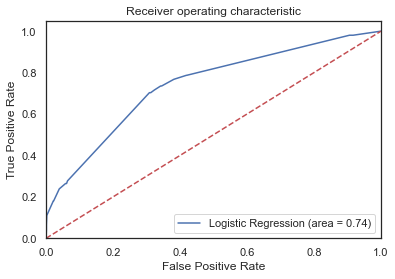

In [76]:
plot_roc_auc(glm_probit_results)

In [77]:
odds_ratios(glm_probit_results)

const                                                           0.314971
BCN_over_barri_satisfaction                                     2.027388
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    0.383949
Time_living_in_barri_MORE THAN 10 YEARS                         0.662726
Barri_satisfaction_FAIRLY SATISFIED                             0.830746
Barri_satisfaction_NOT SATISFIED                                3.783546
Barri_comparison_NEITHER THE BEST, NOR THE WORST                2.102972
Barri_comparison_ONE OF THE WORST                               2.702658
dtype: float64

In [78]:
pseudo_r2(glm_probit_results)

Pseudo R2: 0.13402640676463007


In [79]:
adj_pseudo_r2(glm_probit_results)

Adjusted Pseudo R2: 0.11872289792883539


In [80]:
adj_count_r2(glm_probit_results)

Adj Count R2: 0.058


# Scobit

In [81]:
glm_scobit = sm.GLM(y, x, family=sm.families.Binomial(link=sm.genmod.families.links.cloglog))
glm_scobit_results = glm_scobit.fit()
glm_scobit_results.summary()

C:\Users\THINK\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1169
Model:                                            GLM   Df Residuals:                     1161
Model Family:                                Binomial   Df Model:                            7
Link Function:                                cloglog   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -395.71
Date:                                Sun, 08 Aug 2021   Deviance:                       791.42
Time:                                        12:51:37   Pearson chi2:                 1.20e+03
No. Iterations:                                     8                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.1286      0.282     -7.559      0.000      -2.680      -1.577
BCN_over_barri_satisfaction                                      1.0279      0.492      2.088      0.037       0.063       1.993
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.7000      0.455     -3.738      0.000      -2.591      -0.809
Time_living_in_barri_MORE THAN 10 YEARS                         -0.6740      0.268     -2.517      0.012      -1.199      -0.149
Barri_satisfaction_FAIRLY SATISFIED                             -0.2029      0.467     -0.435      0.664      -1.117       0.712
Barri_satisfaction_NOT SATISFIED                                 1.1042      0.674      1.637      0.102      -0.218       2.426
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.3209      0.189      7.001      0.000       0.951       1.691
Barri_comparison_ONE OF THE WORST                                1.6804      0.326      5.155      0.000       1.041       2.319
================================================================================================================================
"""

In [82]:
glm_scobit_results.aic

807.4219490310483

In [83]:
glm_scobit_results.bic

C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


-7409.770550238023

In [84]:
classification_table(glm_scobit_results)

y_predict,0.0,1.0
y,,
0.0,1012,2
1.0,140,15


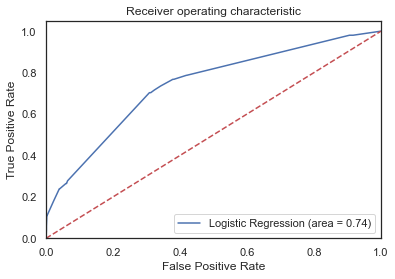

In [85]:
plot_roc_auc(glm_scobit_results)

In [86]:
odds_ratios(glm_scobit_results)

const                                                           0.119007
BCN_over_barri_satisfaction                                     2.795187
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    0.182683
Time_living_in_barri_MORE THAN 10 YEARS                         0.509641
Barri_satisfaction_FAIRLY SATISFIED                             0.816345
Barri_satisfaction_NOT SATISFIED                                3.016699
Barri_comparison_NEITHER THE BEST, NOR THE WORST                3.746953
Barri_comparison_ONE OF THE WORST                               5.367487
dtype: float64

In [87]:
pseudo_r2(glm_scobit_results)

Pseudo R2: 0.13489051501153448


In [88]:
adj_pseudo_r2(glm_scobit_results)

Adjusted Pseudo R2: 0.1195870061757397


In [89]:
adj_count_r2(glm_scobit_results)

Adj Count R2: 0.084


# Results comparison

In [90]:
glm_logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1169
Model:                                            GLM   Df Residuals:                     1161
Model Family:                                Binomial   Df Model:                            7
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -395.39
Date:                                Sun, 08 Aug 2021   Deviance:                       790.78
Time:                                        12:51:38   Pearson chi2:                 1.21e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.0266      0.320     -6.333      0.000      -2.654      -1.399
BCN_over_barri_satisfaction                                      1.2612      0.601      2.099      0.036       0.083       2.439
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.9037      0.509     -3.741      0.000      -2.901      -0.906
Time_living_in_barri_MORE THAN 10 YEARS                         -0.7492      0.314     -2.383      0.017      -1.365      -0.133
Barri_satisfaction_FAIRLY SATISFIED                             -0.3228      0.554     -0.583      0.560      -1.408       0.763
Barri_satisfaction_NOT SATISFIED                                 2.3276      1.223      1.902      0.057      -0.070       4.726
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.4169      0.202      7.012      0.000       1.021       1.813
Barri_comparison_ONE OF THE WORST                                1.8592      0.390      4.764      0.000       1.094       2.624
================================================================================================================================
"""

In [91]:
glm_probit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1169
Model:                                            GLM   Df Residuals:                     1161
Model Family:                                Binomial   Df Model:                            7
Link Function:                                 probit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -396.11
Date:                                Sun, 08 Aug 2021   Deviance:                       792.21
Time:                                        12:51:38   Pearson chi2:                 1.22e+03
No. Iterations:                                     6                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -1.1553      0.178     -6.501      0.000      -1.504      -0.807
BCN_over_barri_satisfaction                                      0.7067      0.336      2.104      0.035       0.048       1.365
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.9572      0.256     -3.740      0.000      -1.459      -0.456
Time_living_in_barri_MORE THAN 10 YEARS                         -0.4114      0.179     -2.304      0.021      -0.761      -0.061
Barri_satisfaction_FAIRLY SATISFIED                             -0.1854      0.305     -0.608      0.543      -0.784       0.413
Barri_satisfaction_NOT SATISFIED                                 1.3307      0.641      2.076      0.038       0.074       2.587
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 0.7434      0.104      7.157      0.000       0.540       0.947
Barri_comparison_ONE OF THE WORST                                0.9942      0.225      4.414      0.000       0.553       1.436
================================================================================================================================
"""

In [92]:
glm_scobit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1169
Model:                                            GLM   Df Residuals:                     1161
Model Family:                                Binomial   Df Model:                            7
Link Function:                                cloglog   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -395.71
Date:                                Sun, 08 Aug 2021   Deviance:                       791.42
Time:                                        12:51:38   Pearson chi2:                 1.20e+03
No. Iterations:                                     8                                         
Covariance Type:                            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           -2.1286      0.282     -7.559      0.000      -2.680      -1.577
BCN_over_barri_satisfaction                                      1.0279      0.492      2.088      0.037       0.063       1.993
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -1.7000      0.455     -3.738      0.000      -2.591      -0.809
Time_living_in_barri_MORE THAN 10 YEARS                         -0.6740      0.268     -2.517      0.012      -1.199      -0.149
Barri_satisfaction_FAIRLY SATISFIED                             -0.2029      0.467     -0.435      0.664      -1.117       0.712
Barri_satisfaction_NOT SATISFIED                                 1.1042      0.674      1.637      0.102      -0.218       2.426
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 1.3209      0.189      7.001      0.000       0.951       1.691
Barri_comparison_ONE OF THE WORST                                1.6804      0.326      5.155      0.000       1.041       2.319
================================================================================================================================
"""

In [93]:
odds_ratios(glm_logit_results)

const                                                            0.131783
BCN_over_barri_satisfaction                                      3.529763
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD     0.149012
Time_living_in_barri_MORE THAN 10 YEARS                          0.472743
Barri_satisfaction_FAIRLY SATISFIED                              0.724150
Barri_satisfaction_NOT SATISFIED                                10.252854
Barri_comparison_NEITHER THE BEST, NOR THE WORST                 4.124498
Barri_comparison_ONE OF THE WORST                                6.418561
dtype: float64

In [94]:
odds_ratios(glm_probit_results)

const                                                           0.314971
BCN_over_barri_satisfaction                                     2.027388
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    0.383949
Time_living_in_barri_MORE THAN 10 YEARS                         0.662726
Barri_satisfaction_FAIRLY SATISFIED                             0.830746
Barri_satisfaction_NOT SATISFIED                                3.783546
Barri_comparison_NEITHER THE BEST, NOR THE WORST                2.102972
Barri_comparison_ONE OF THE WORST                               2.702658
dtype: float64

In [95]:
odds_ratios(glm_scobit_results)

const                                                           0.119007
BCN_over_barri_satisfaction                                     2.795187
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    0.182683
Time_living_in_barri_MORE THAN 10 YEARS                         0.509641
Barri_satisfaction_FAIRLY SATISFIED                             0.816345
Barri_satisfaction_NOT SATISFIED                                3.016699
Barri_comparison_NEITHER THE BEST, NOR THE WORST                3.746953
Barri_comparison_ONE OF THE WORST                               5.367487
dtype: float64

In [96]:
classification_table(glm_logit_results)

y_predict,0.0,1.0
y,,
0.0,1012,2
1.0,139,16


In [97]:
classification_table(glm_probit_results)

y_predict,0.0,1.0
y,,
0.0,1013,1
1.0,145,10


In [98]:
classification_table(glm_scobit_results)

y_predict,0.0,1.0
y,,
0.0,1012,2
1.0,140,15


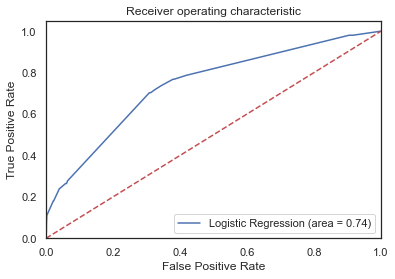

In [99]:
plot_roc_auc(glm_logit_results)

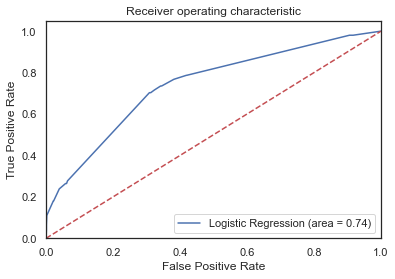

In [100]:
plot_roc_auc(glm_probit_results)

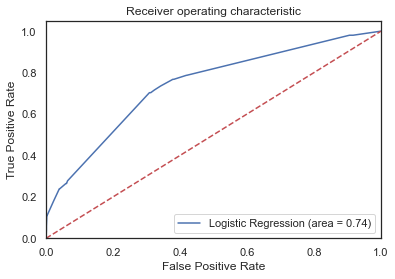

In [101]:
plot_roc_auc(glm_scobit_results)

In [102]:
print("Logit")
adj_pseudo_r2(glm_logit_results)
adj_count_r2(glm_logit_results)

Logit
Adjusted Pseudo R2: 0.12028994271640503
Adj Count R2: 0.09


In [103]:
print("Probit")
adj_pseudo_r2(glm_probit_results)
adj_count_r2(glm_probit_results)

Probit
Adjusted Pseudo R2: 0.11872289792883539
Adj Count R2: 0.058


In [104]:
print("Scobit")
adj_pseudo_r2(glm_scobit_results)
adj_count_r2(glm_scobit_results)

Scobit
Adjusted Pseudo R2: 0.1195870061757397
Adj Count R2: 0.084


In [105]:
print("Logit \n AIC:", glm_logit_results.aic, "BIC:", glm_logit_results.bic)

Logit 
 AIC: 806.778886601712 BIC: -7410.413612667359


C:\Users\THINK\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1731: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  FutureWarning


In [106]:
print("Probit \n AIC:", glm_probit_results.aic, "BIC:", glm_probit_results.bic)

Probit 
 AIC: 808.2124550245735 BIC: -7408.980044244498


In [107]:
print("Scobit \n AIC:", glm_scobit_results.aic, "BIC:", glm_scobit_results.bic)

Scobit 
 AIC: 807.4219490310483 BIC: -7409.770550238023


Results of AIC, BIC, McFadden's pseudo R2 and adjusted count R2 indicate that the best model is logit.

In [108]:
x.shape

(1169, 8)

### Marginal effects for logit model

In [109]:
logit_mod = sm.Logit(y, x)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.338229
         Iterations 7
                                   Logit Regression Results                                   
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1169
Model:                                          Logit   Df Residuals:                     1161
Method:                                           MLE   Df Model:                            7
Date:                                Sun, 08 Aug 2021   Pseudo R-squ.:                  0.1356
Time:                                        12:51:39   Log-Likelihood:                -395.39
converged:                                       True   LL-Null:                       -457.41
Covariance Type:                            nonrobust   LLR p-value:                 1.100e-23
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
---------

In [110]:
logit_margeff = logit_res.get_margeff()
print(logit_margeff.summary())

                Logit Marginal Effects               
Dep. Variable:     Would_live_in_another_neighborhood
Method:                                          dydx
At:                                           overall
                                                                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
BCN_over_barri_satisfaction                                      0.1265      0.060      2.107      0.035       0.009       0.244
Time_living_in_barri_I HAVE ALWAYS LIVED IN THE NEIGHBORHOOD    -0.1910      0.051     -3.751      0.000      -0.291      -0.091
Time_living_in_barri_MORE THAN 10 YEARS                         -0.0752      0.031     -2.393      0.017      -0.137      -0.014
Barri_satisfaction_FAIRLY SATISFIED                             -0.0324      0.056     -0.583      0.560      -0.141       0.077
Barri_sati

### Linktest

In [111]:
def linktest(results):
    linktest_dict = {}
    linktest_dict['yhat'] = results.predict(x)
    linktest_dict['yhat_2'] = results.predict(x)**2
    linktest_df = pd.DataFrame.from_dict(linktest_dict)
    linktest_df = sm.add_constant(linktest_df)
    return sm.GLM(y, linktest_df, family=sm.families.Binomial()).fit().summary()

In [112]:
linktest(glm_logit_results)

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Generalized Linear Model Regression Results                          
==============================================================================================
Dep. Variable:     Would_live_in_another_neighborhood   No. Observations:                 1169
Model:                                            GLM   Df Residuals:                     1166
Model Family:                                Binomial   Df Model:                            2
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -395.24
Date:                                Sun, 08 Aug 2021   Deviance:                       790.48
Time:                                        12:51:39   Pearson chi2:                 1.15e+03
No. Iterations:                                     5                                         
Covariance Type:                            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2912      0.216    -15.206      0.000      -3.715      -2.867
yhat           9.7212      1.568      6.201      0.000       6.649      12.794
yhat_2        -4.2958      2.291     -1.875      0.061      -8.787       0.195
==============================================================================
"""